In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression


In [2]:
# take consomaion data
df = pd.read_excel("Data/conso_clean.xlsx")
df

,Mois,Territoire,Consommation totale
0,2012-01,France,51086
1,2012-02,France,54476
2,2012-03,France,43156
3,2012-04,France,40176
4,2012-05,France,35257
...,...,...,...
1398,2021-11,Occitanie,3581
1399,2021-11,Normandie,2528
1400,2021-11,Hauts-de-France,4593
1401,2021-11,PACA,3561


In [3]:
# select french territory
consommation_france=df.loc[df['Territoire']=='France',['Mois','Consommation totale']]

# transform mois to data time format
consommation_france['Mois']=pd.to_datetime(consommation_france["Mois"])

# delete negative or null values
consommation_france=consommation_france.loc[consommation_france['Consommation totale']>0,:]

# rename column
consommation_france=consommation_france.rename(columns={'Consommation totale': 'Conso_totale'})

consommation_france

,Mois,Conso_totale
0,2012-01-01,51086
1,2012-02-01,54476
2,2012-03-01,43156
3,2012-04-01,40176
4,2012-05-01,35257
...,...,...
1344,2021-07-01,32959
1357,2021-08-01,31184
1370,2021-09-01,32350
1383,2021-10-01,36762


In [4]:
# take info to see format and if they are missing values
consommation_france.info()
# no missing value

consommation_france["Mois"] = pd.to_datetime(consommation_france['Mois'],format='%m/%d/%y %I:%M%p')

consommation_france["Year"] = consommation_france["Mois"].dt.year
print("sum")
print(consommation_france.groupby(consommation_france['Year']).sum())
print("mean")
print(consommation_france.groupby(consommation_france['Year']).mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 1396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Mois          119 non-null    datetime64[ns]
 1   Conso_totale  119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB
sum
      Conso_totale   Year
Year                     
2012        489517  24144
2013        494842  24156
2014        465150  24168
2015        476050  24180
2016        483219  24192
2017        482008  24204
2018        478431  24216
2019        473401  24228
2020        449005  24240
2021        422419  22231
mean
      Conso_totale
Year              
2012  40793.083333
2013  41236.833333
2014  38762.500000
2015  39670.833333
2016  40268.250000
2017  40167.333333
2018  39869.250000
2019  39450.083333
2020  37417.083333
2021  38401.727273


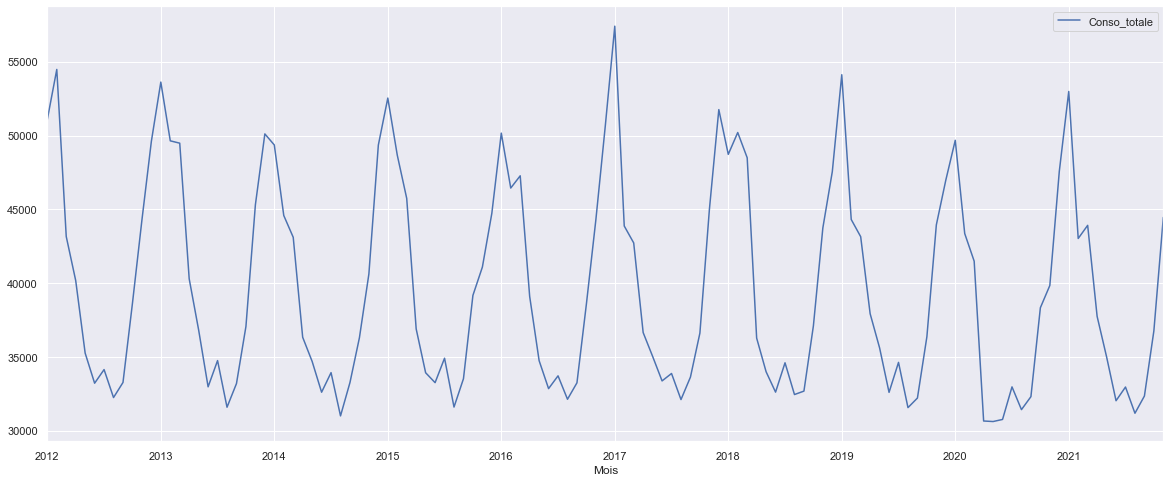

In [5]:
# display consommation in times
sns.set(rc={'figure.figsize':(20, 8)})
consommation_france.plot(y="Conso_totale",x='Mois')

In [6]:
# take meteo data
meteo0=pd.read_excel('Data/calcul_DJU_clim_Avignon.xlsx',skiprows=11)
meteo1=pd.read_excel('Data/calcul_DJU_clim_Bordeaux.xlsx',skiprows=11)
meteo2=pd.read_excel('Data/calcul_DJU_clim_Brest.xlsx',skiprows=11)
meteo3=pd.read_excel('Data/calcul_DJU_clim_Lyon.xlsx',skiprows=11)
meteo4=pd.read_excel('Data/calcul_DJU_clim_Montpellier.xlsx',skiprows=11)
meteo5=pd.read_excel('Data/calcul_DJU_clim_Paris.xlsx',skiprows=11)
meteo6=pd.read_excel('Data/calcul_DJU_clim_Strasbourg.xlsx',skiprows=11)


meteo0

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,0.1,0.6,4.9,11.2,39.7,87.5,0.0,0.0,0.0,0.0,0.0,0.0,144.1
1,2020,0.1,2.1,4.7,22.0,81.6,132.0,236.5,228.4,120.0,11.7,3.7,0.0,842.8
2,2019,0.0,2.7,7.7,10.3,47.7,167.9,261.1,233.2,127.2,42.0,1.4,0.1,901.3
3,2018,1.0,0.0,1.2,37.3,59.4,139.3,260.2,224.3,137.3,34.7,3.3,0.0,898.0
4,2017,0.0,0.7,10.6,19.7,71.8,195.2,230.2,230.8,71.8,48.9,3.0,0.0,882.7
5,2016,0.0,0.9,3.0,11.1,46.1,136.5,230.0,200.4,142.4,16.5,2.7,0.0,789.7
6,2015,0.4,0.0,3.7,22.0,69.8,166.1,273.6,199.7,77.2,14.2,6.8,0.0,833.4
7,2014,0.0,0.0,6.6,23.1,54.0,165.5,152.4,163.5,118.3,66.7,3.1,0.0,753.3
8,2013,0.0,0.0,0.4,15.8,16.6,102.7,232.9,180.1,100.0,51.2,3.1,0.0,702.7
9,2012,0.0,0.3,17.8,14.4,65.5,153.7,197.0,239.7,97.4,51.4,0.4,0.0,837.6


In [7]:
meteo = (meteo0 + meteo1  + meteo2  + meteo3 + meteo4 + meteo5 + meteo6)/7
meteo

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021.0,0.057143,0.828571,4.328571,7.928571,19.828571,59.185714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.157143
1,2020.0,0.042857,1.442857,2.057143,22.385714,57.971429,82.342857,153.214286,168.300000,89.042857,5.671429,2.428571,0.000000,584.914286
2,2019.0,0.000000,1.700000,3.185714,10.457143,23.585714,114.685714,184.414286,147.671429,72.771429,21.957143,0.400000,0.057143,580.871429
3,2018.0,0.285714,0.000000,0.357143,24.400000,49.500000,101.671429,183.742857,164.928571,88.871429,26.500000,1.128571,0.200000,641.485714
4,2017.0,0.000000,0.271429,5.971429,10.885714,57.957143,134.700000,146.400000,144.014286,37.400000,26.042857,1.000000,0.000000,564.657143
5,2016.0,0.000000,0.257143,1.114286,4.342857,27.457143,77.385714,142.471429,142.442857,95.771429,8.742857,0.828571,0.000000,500.771429
6,2015.0,0.171429,0.000000,1.214286,15.471429,36.557143,107.657143,186.971429,142.014286,39.142857,7.442857,5.057143,0.000000,541.642857
7,2014.0,0.000000,0.042857,3.828571,13.271429,26.257143,103.985714,115.614286,88.557143,81.042857,36.114286,1.542857,0.028571,470.342857
8,2013.0,0.042857,0.014286,0.385714,11.357143,9.457143,62.685714,169.685714,121.485714,61.914286,26.600000,1.442857,0.000000,465.028571
9,2012.0,0.014286,0.242857,10.171429,5.257143,46.200000,85.357143,108.814286,152.300000,58.214286,21.571429,0.157143,0.000000,488.328571


In [8]:
meteo=meteo.drop(columns=['Total'])


In [9]:
meteo["Unnamed: 0"] = meteo["Unnamed: 0"].astype(int)

meteo=meteo.rename(columns={"Unnamed: 0": "Année",
                      "JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})
meteo = meteo.set_index("Année")

meteo

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2021,0.057143,0.828571,4.328571,7.928571,19.828571,59.185714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,0.042857,1.442857,2.057143,22.385714,57.971429,82.342857,153.214286,168.300000,89.042857,5.671429,2.428571,0.000000
2019,0.000000,1.700000,3.185714,10.457143,23.585714,114.685714,184.414286,147.671429,72.771429,21.957143,0.400000,0.057143
2018,0.285714,0.000000,0.357143,24.400000,49.500000,101.671429,183.742857,164.928571,88.871429,26.500000,1.128571,0.200000
2017,0.000000,0.271429,5.971429,10.885714,57.957143,134.700000,146.400000,144.014286,37.400000,26.042857,1.000000,0.000000
2016,0.000000,0.257143,1.114286,4.342857,27.457143,77.385714,142.471429,142.442857,95.771429,8.742857,0.828571,0.000000
2015,0.171429,0.000000,1.214286,15.471429,36.557143,107.657143,186.971429,142.014286,39.142857,7.442857,5.057143,0.000000
2014,0.000000,0.042857,3.828571,13.271429,26.257143,103.985714,115.614286,88.557143,81.042857,36.114286,1.542857,0.028571
2013,0.042857,0.014286,0.385714,11.357143,9.457143,62.685714,169.685714,121.485714,61.914286,26.600000,1.442857,0.000000


In [10]:
meteo_newformat={'mois':[],'climatisation':[]}

for Année in meteo.index.values:
    for mois in meteo.columns:
        meteo_newformat['mois'].append(f"{Année}-{mois}-01")
        meteo_newformat['climatisation'].append(meteo.loc[Année,mois])
        
meteo_newformat=pd.DataFrame(meteo_newformat)
meteo_newformat['mois']=pd.to_datetime(meteo_newformat['mois'])

meteo_newformat

,mois,climatisation
0,2021-01-01,0.057143
1,2021-02-01,0.828571
2,2021-03-01,4.328571
3,2021-04-01,7.928571
4,2021-05-01,19.828571
...,...,...
151,2009-08-01,154.442857
152,2009-09-01,63.571429
153,2009-10-01,20.885714
154,2009-11-01,1.071429


### Chauffage 

In [11]:
# take meteo data
meteo_chau=pd.read_excel('Data/calcul_DJU_chau_Paris.xlsx',skiprows=11)

meteo_chau0=pd.read_excel('Data/calcul_DJU_chau_Avignon.xlsx',skiprows=11)
meteo_chau1=pd.read_excel('Data/calcul_DJU_chau_Bordeaux.xlsx',skiprows=11)
meteo_chau2=pd.read_excel('Data/calcul_DJU_chau_Brest.xlsx',skiprows=11)
meteo_chau3=pd.read_excel('Data/calcul_DJU_chau_Lyon.xlsx',skiprows=11)
meteo_chau4=pd.read_excel('Data/calcul_DJU_chau_Montpellier.xlsx',skiprows=11)
meteo_chau5=pd.read_excel('Data/calcul_DJU_chau_Paris.xlsx',skiprows=11)
meteo_chau6=pd.read_excel('Data/calcul_DJU_chau_Strasbourg.xlsx',skiprows=11)


meteo_chau

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,396.7,303.3,276.5,232.2,147.1,7.9,0.0,0.0,0.0,0.0,0.0,0.0,1363.6
1,2020,339.0,249.6,269.2,105.6,85.9,37.7,16.5,12.6,46.1,158.9,227.7,336.8,1885.6
2,2019,404.9,268.8,234.3,177.2,126.8,35.7,10.0,11.8,45.3,136.9,282.6,327.3,2061.8
3,2018,303.4,432.6,314.4,128.9,74.1,20.1,1.6,13.5,53.7,133.4,282.8,325.9,2084.2
4,2017,467.9,278.4,208.9,187.1,87.8,21.4,13.5,20.8,74.5,109.3,282.6,369.0,2121.2
5,2016,364.4,321.6,321.1,214.1,100.7,40.8,14.7,13.8,27.3,177.3,285.6,390.8,2271.9
6,2015,392.0,365.7,275.7,154.6,104.8,36.4,15.8,16.1,81.8,179.6,196.9,248.1,2067.5
7,2014,324.4,281.9,226.6,141.8,112.5,37.3,17.7,36.1,34.4,101.3,223.3,368.2,1905.3
8,2013,429.2,402.2,376.6,216.3,161.5,57.6,9.3,19.9,55.3,112.0,303.9,349.5,2493.2
9,2012,336.0,435.9,210.5,231.2,93.8,50.4,29.8,14.1,72.6,159.2,296.2,345.9,2275.5


In [12]:
meteo_chau = (meteo_chau0 + meteo_chau1  + meteo_chau2  + meteo_chau3 + meteo_chau4 + meteo_chau5 + meteo_chau6)/7

meteo_chau["Unnamed: 0"] = meteo_chau["Unnamed: 0"].astype(int)
meteo_chau

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,392.528571,266.014286,271.114286,215.000000,135.671429,11.871429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1292.171429
1,2020,332.957143,245.914286,258.414286,131.028571,80.214286,40.614286,21.185714,15.071429,51.571429,151.371429,222.042857,335.642857,1885.985714
2,2019,398.457143,273.271429,231.271429,182.971429,122.685714,41.271429,13.271429,19.114286,46.471429,104.857143,269.214286,303.657143,2006.514286
3,2018,287.100000,396.642857,292.242857,137.371429,82.071429,22.614286,8.871429,18.128571,47.742857,131.857143,245.442857,314.442857,1984.414286
4,2017,457.614286,259.371429,206.714286,183.442857,88.514286,25.271429,16.342857,22.514286,76.657143,112.542857,277.900000,368.000000,2094.871429
5,2016,329.828571,295.442857,295.185714,191.628571,103.300000,33.971429,17.971429,18.585714,33.442857,163.914286,261.300000,375.885714,2120.400000
6,2015,370.600000,355.957143,257.471429,158.328571,89.314286,33.728571,14.614286,20.542857,71.128571,166.842857,205.285714,246.600000,1990.328571
7,2014,312.657143,272.814286,240.085714,141.142857,105.557143,32.028571,17.571429,32.557143,37.900000,85.071429,198.228571,346.700000,1822.271429
8,2013,398.457143,384.014286,321.714286,205.785714,152.185714,55.285714,11.757143,21.442857,49.200000,95.528571,288.100000,350.842857,2334.271429
9,2012,348.985714,444.185714,219.442857,203.771429,90.285714,39.028571,27.585714,15.085714,62.085714,142.085714,254.314286,342.285714,2189.028571


In [13]:
meteo_chau=meteo_chau.drop(columns=['Total'])


In [14]:
meteo_chau=meteo_chau.rename(columns={"Unnamed: 0": "Année",
                      "JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})
meteo_chau = meteo_chau.set_index("Année")

meteo_chau

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2021,392.528571,266.014286,271.114286,215.000000,135.671429,11.871429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,332.957143,245.914286,258.414286,131.028571,80.214286,40.614286,21.185714,15.071429,51.571429,151.371429,222.042857,335.642857
2019,398.457143,273.271429,231.271429,182.971429,122.685714,41.271429,13.271429,19.114286,46.471429,104.857143,269.214286,303.657143
2018,287.100000,396.642857,292.242857,137.371429,82.071429,22.614286,8.871429,18.128571,47.742857,131.857143,245.442857,314.442857
2017,457.614286,259.371429,206.714286,183.442857,88.514286,25.271429,16.342857,22.514286,76.657143,112.542857,277.900000,368.000000
2016,329.828571,295.442857,295.185714,191.628571,103.300000,33.971429,17.971429,18.585714,33.442857,163.914286,261.300000,375.885714
2015,370.600000,355.957143,257.471429,158.328571,89.314286,33.728571,14.614286,20.542857,71.128571,166.842857,205.285714,246.600000
2014,312.657143,272.814286,240.085714,141.142857,105.557143,32.028571,17.571429,32.557143,37.900000,85.071429,198.228571,346.700000
2013,398.457143,384.014286,321.714286,205.785714,152.185714,55.285714,11.757143,21.442857,49.200000,95.528571,288.100000,350.842857


In [15]:
meteo_chau_newformat={'mois':[],'chauffage':[]}

for Année in meteo_chau.index.values:
    for mois in meteo_chau.columns:
        meteo_chau_newformat['mois'].append(f"{Année}-{mois}-01")
        meteo_chau_newformat['chauffage'].append(meteo_chau.loc[Année,mois])
        
meteo_chau_newformat=pd.DataFrame(meteo_chau_newformat)
meteo_chau_newformat['mois']=pd.to_datetime(meteo_chau_newformat['mois'])

meteo_chau_newformat

,mois,chauffage
0,2021-01-01,392.528571
1,2021-02-01,266.014286
2,2021-03-01,271.114286
3,2021-04-01,215.000000
4,2021-05-01,135.671429
...,...,...
151,2009-08-01,17.285714
152,2009-09-01,50.528571
153,2009-10-01,140.585714
154,2009-11-01,208.500000


### DJU


In [16]:
dju=meteo_newformat.merge(meteo_chau_newformat,on='mois',how='inner')
dju['dju']=dju['chauffage']+dju['climatisation']
dju.head(60)



,mois,climatisation,chauffage,dju
0,2021-01-01,0.057143,392.528571,392.585714
1,2021-02-01,0.828571,266.014286,266.842857
2,2021-03-01,4.328571,271.114286,275.442857
3,2021-04-01,7.928571,215.000000,222.928571
4,2021-05-01,19.828571,135.671429,155.500000
5,2021-06-01,59.185714,11.871429,71.057143
6,2021-07-01,0.000000,0.000000,0.000000
7,2021-08-01,0.000000,0.000000,0.000000
8,2021-09-01,0.000000,0.000000,0.000000
9,2021-10-01,0.000000,0.000000,0.000000


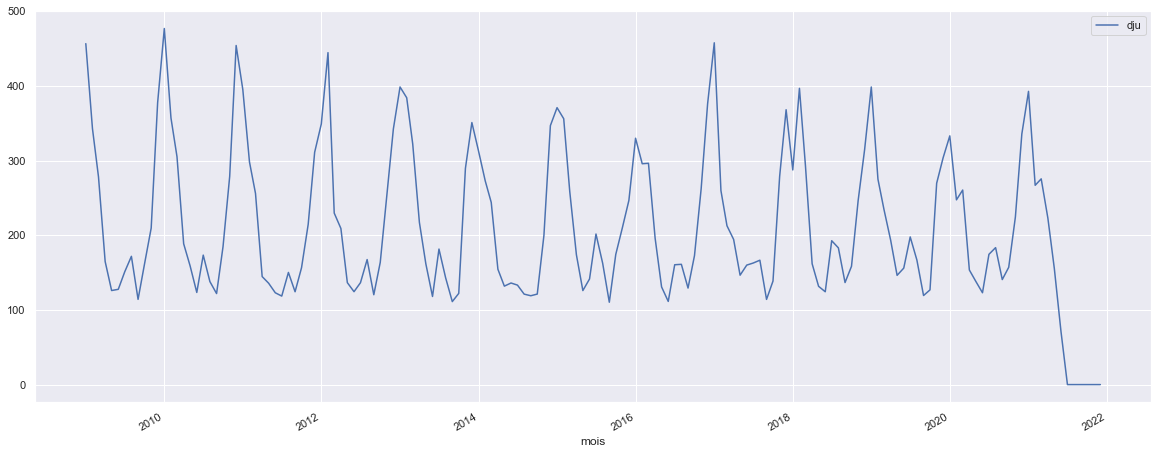

In [17]:
dju.plot(y="dju",x='mois')

In [18]:
# link data consomation with dju
df=consommation_france.merge(dju,left_on='Mois',right_on='mois')

# delete 5 last raws
df = df[:-5]

df = df.set_index("Mois")

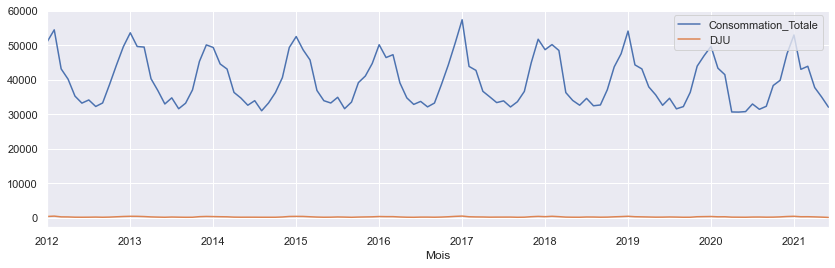

In [19]:
# display conso & DJU
df['Conso_totale'].plot(figsize=(14,4),label="Consommation_Totale")
df['dju'].plot(figsize=(14,4),label="DJU")
plt.legend()

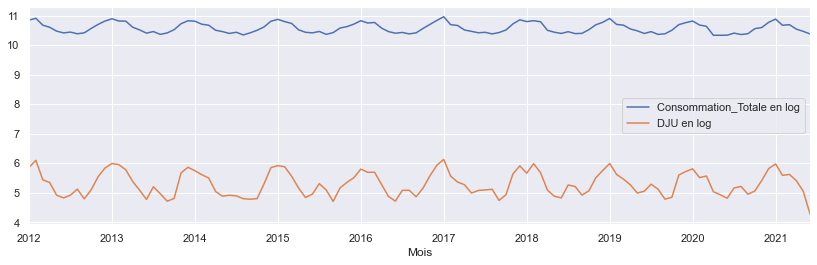

In [20]:
# display log conso and DJU
np.log(df['Conso_totale']).plot(figsize=(14,4),label="Consommation_Totale en log")
np.log(df['dju']).plot(figsize=(14,4),label="DJU en log")
plt.legend()

## désaisonalisation avec regression linéaire

In [21]:
df['t']=range(1, df.shape[0]+1)
y=df['Conso_totale']
x=df[['dju']]
x

,dju
Mois,
2012-01-01,349.000000
2012-02-01,444.428571
2012-03-01,229.614286
2012-04-01,209.028571
2012-05-01,136.485714
...,...
2021-02-01,266.842857
2021-03-01,275.442857
2021-04-01,222.928571


In [22]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)
regression=reg.fit(x, y)
regression

LinearRegression()

In [23]:
print(reg.coef_,reg.intercept_)
c = reg.coef_[0]
serie_corrigee = df['Conso_totale'] - df['dju']*c

[75.29839589] 23509.977947121315


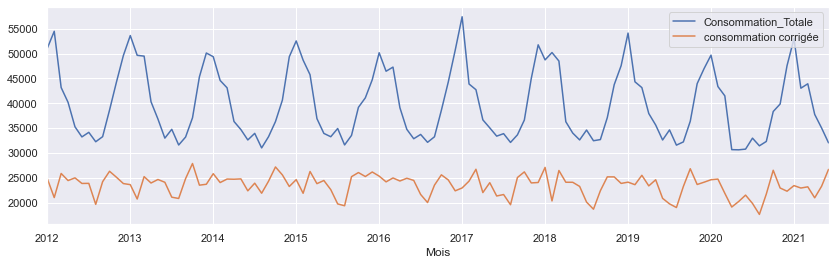

In [24]:
df['Conso_totale'].plot(figsize=(14,4),label="Consommation_Totale")
serie_corrigee.plot(label='consommation corrigée')
plt.legend()

## statmodel

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_multip = smf.ols('Conso_totale ~ dju', data=df).fit()

In [26]:
print(reg_multip.summary())

                            OLS Regression Results                            
Dep. Variable:           Conso_totale   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1116.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           4.65e-60
Time:                        14:26:20   Log-Likelihood:                -1035.4
No. Observations:                 114   AIC:                             2075.
Df Residuals:                     112   BIC:                             2080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.351e+04    527.374     44.579      0.0

In [27]:
serie_corr_df = pd.DataFrame({'Mois':serie_corrigee.index, 'corrigee':serie_corrigee.values})

serie_corr_df

,Mois,corrigee
0,2012-01-01,24806.859834
1,2012-02-01,21011.241483
2,2012-03-01,25866.412612
3,2012-04-01,24436.483876
4,2012-05-01,24979.844652
...,...,...
109,2021-02-01,22931.160902
110,2021-03-01,23172.594697
111,2021-04-01,20960.836173
112,2021-05-01,23298.099439


In [28]:
from scipy.stats import shapiro
shapiro(reg_multip.resid)

ShapiroResult(statistic=0.9631683826446533, pvalue=0.003163641784340143)

[('Lagrande multiplier statistic', 4.194254887621814), ('p-value', 0.0405611742842357), ('f-value', 4.2780689383135755), ('f p-value', 0.04090986380378852)]
Shapiro pvalue : 0.003163641784340143


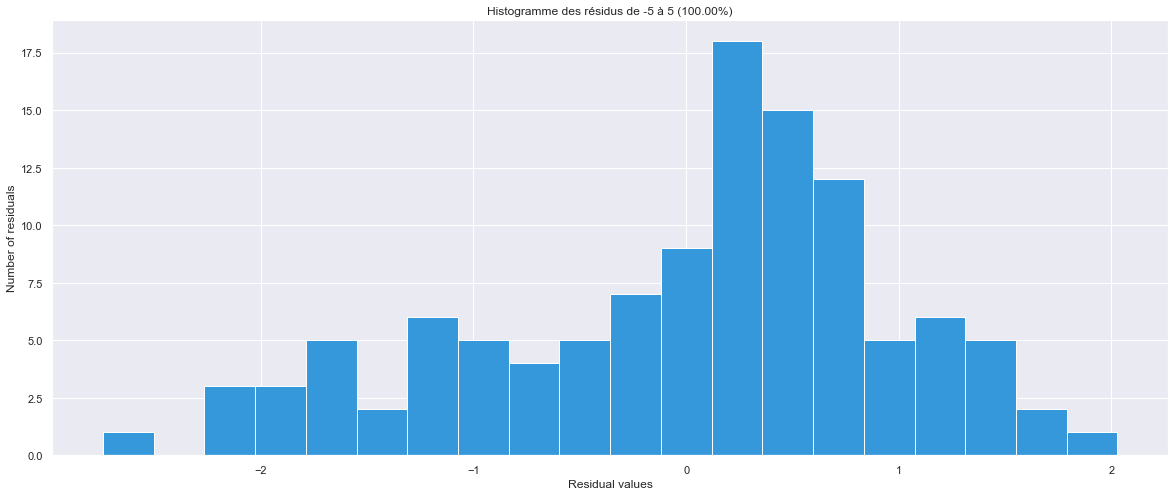

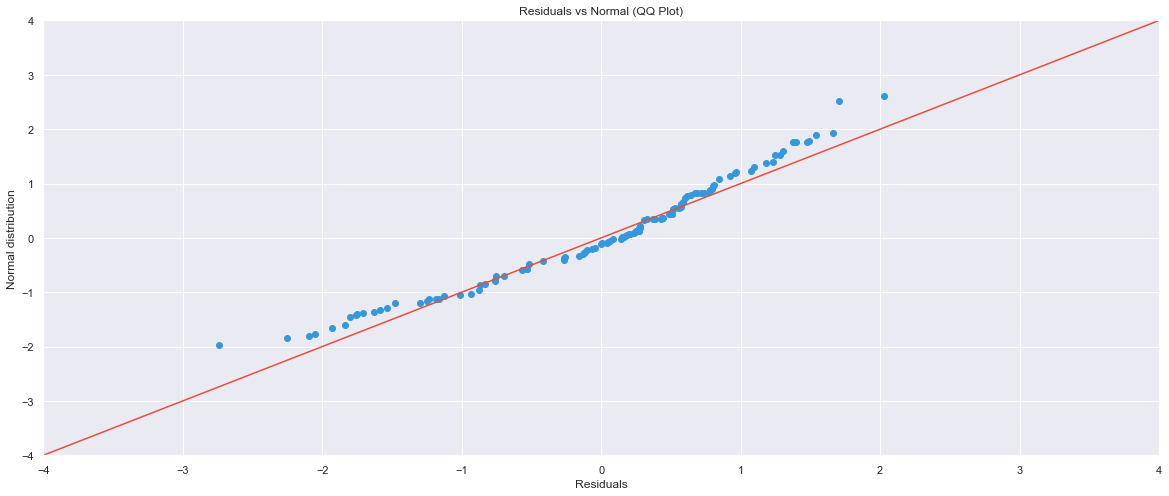

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import outliers_influence
from statsmodels.compat import lzip

#from descstats import MyPlot, Univa

import warnings
warnings.filterwarnings(action="ignore", module="sklearn", message="^internal gelsd")

###############################################################
# Linear Regression Analysis
###############################################################

def linear_regression_analysis(linear_regression):
    """ Compute and plot a complete analysis of a linear regression computed with Stats Models.
    Args:
         linear_regression (Stats Models Results): the result obtained  with Stats Models.

    """

    # Data
    resid = linear_regression.resid_pearson.copy()
    resid_index = linear_regression.resid.index
    exog = linear_regression.model.exog
    endog = linear_regression.model.endog
    fitted_values = linear_regression.fittedvalues
    influences = outliers_influence.OLSInfluence(linear_regression)

    p = exog.shape[1] # Number of features
    n = len(resid) # Number of individuals

    # Paramètres
    color1 = "#3498db"
    color2 = "#e74c3c"

    ##############################################################################
    # Tests statistiques                                                         #
    ##############################################################################

    # Homoscédasticité - Test de Breusch-Pagan
    ##########################################

    names = ['Lagrande multiplier statistic', 'p-value', 'f-value', 'f p-value']
    breusch_pagan = sm.stats.diagnostic.het_breuschpagan(resid, exog)
    print(lzip(names, breusch_pagan))

    # Test de normalité - Shapiro-Wilk
    ###################################

    print(f"Shapiro pvalue : {st.shapiro(resid)[1]}")

    ##############################################################################
    # Analyses de forme                                                          #
    ##############################################################################

    # Histogramme des résidus
    ##########################
    data = resid
    data_filter = data
#     data_filter = data[data < 5]
#     data_filter = data[data > -5]
    len_data = len(data)
    len_data_filter = len(data_filter)
    ratio = len_data_filter / len_data

    fig, ax = plt.subplots()
    plt.hist(data_filter, bins=20, color=color1)
    plt.xlabel("Residual values")
    plt.ylabel("Number of residuals")
    plt.title(f"Histogramme des résidus de -5 à 5 ({ratio:.2%})")

    # Normal distribution vs residuals (QQ Plot, droite de Henry)
    #############################################################
    data = pd.Series(resid).sort_values()
    len_data = len(data)

    normal = pd.Series(np.random.normal(size=len_data)).sort_values()
    fig, ax = plt.subplots()
    plt.scatter(data, normal, c=color1)
    plt.plot((-4,4), (-4, 4), c=color2)
    plt.xlabel("Residuals")
    plt.ylabel("Normal distribution")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title("Residuals vs Normal (QQ Plot)")

    
    # Plot
    plt.show()

linear_regression_analysis(reg_multip)

désaisonalisé

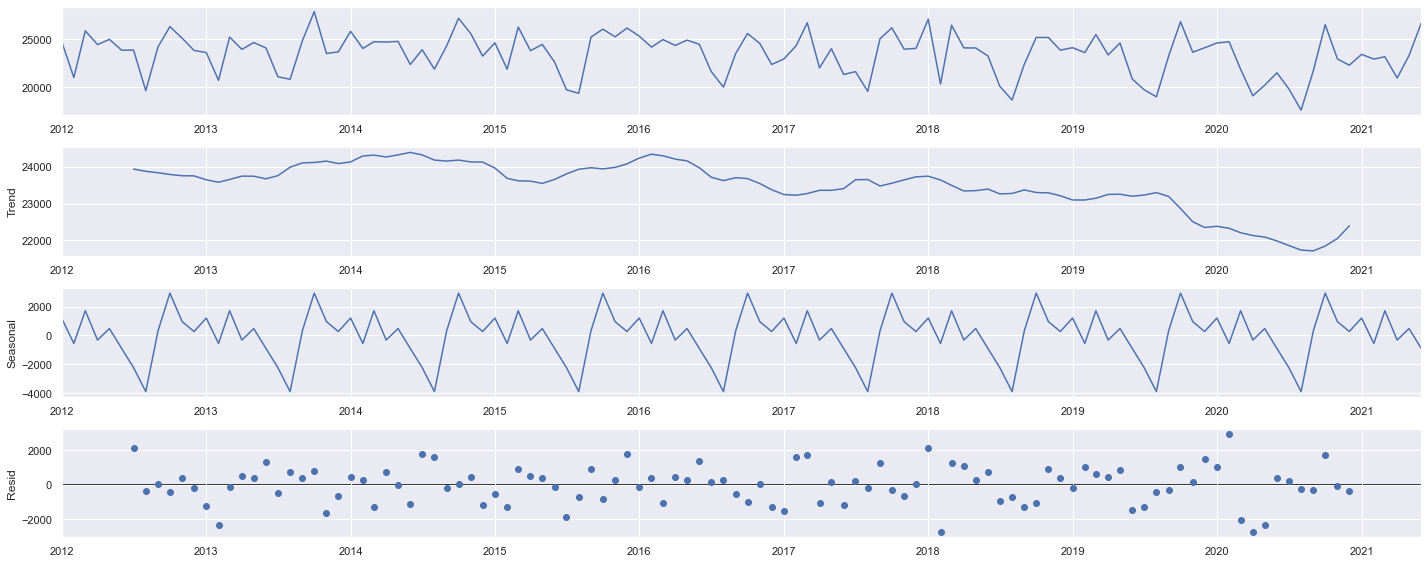

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_x = seasonal_decompose(serie_corrigee,  model='additive')
decomp_x.plot()
plt.show()

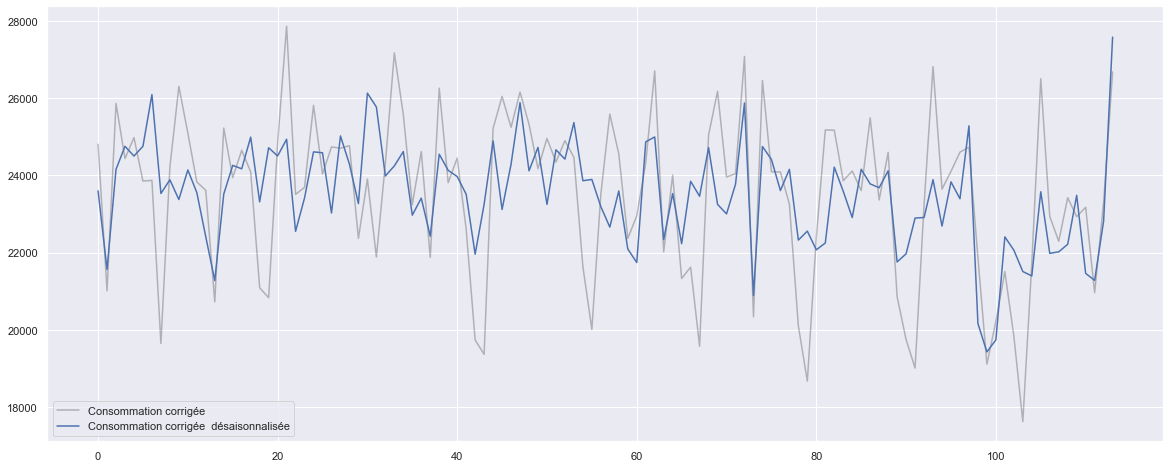

In [31]:
serie_corr_df['corrigee_desaison'] = serie_corrigee.values - decomp_x.seasonal.values
plt.plot(serie_corr_df["corrigee"],'black', label="Consommation corrigée",alpha=0.25)
plt.plot(serie_corr_df["corrigee_desaison"],'b', label="Consommation corrigée  désaisonnalisée")

plt.legend()
plt.show()

In [32]:
# Et enfin pour la méthode de Holt-Winters :


x_tronc = serie_corr_df.iloc[:-12,:]
# y= np.asarray(x_tronc["corrigee"])

from statsmodels.tsa.api import ExponentialSmoothing

y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

hw.params



F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.2631578947368421,
 'damping_slope': nan,
 'initial_level': 24769.55079217464,
 'initial_slope': 0.01,
 'initial_seasons': array([   37.30904179, -3758.30930897,  1096.86181983,  -333.06691618,
          210.29386004,  -916.59554967,  -899.25199174, -5126.426573  ,
         -558.94781789,  1535.32887454,   329.15883625,  -941.11601437]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

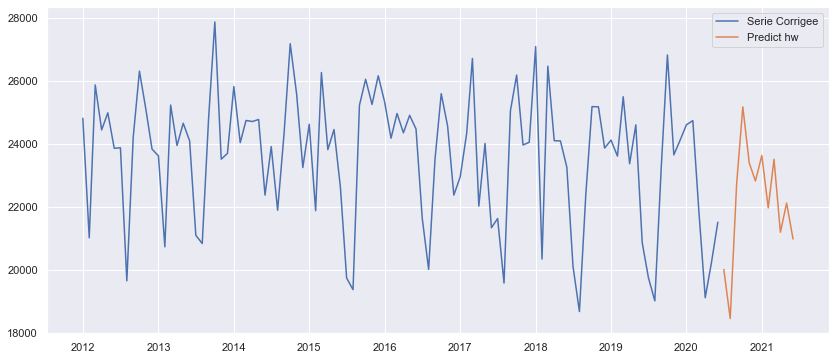

In [33]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'][:-12],serie_corr_df['corrigee'][:-12], label='Serie Corrigee')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), hw_pred, label='Predict hw')
plt.legend()
plt.show()

In [34]:
# comparaison des prédiction avec les valeur connu

x_tronc = serie_corr_df.iloc[:-12,:]
#y_tronc = np.log(x_tronc)
x_a_prevoir = serie_corr_df.iloc[-12:,:]

In [35]:
y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)
hw_pred

F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


array([20004.67123948, 18446.77526093, 22717.66214905, 25170.40254401,
       23392.08628628, 22814.09215484, 23625.56073521, 21959.39139321,
       23503.95193386, 21186.44876574, 22113.69700252, 20971.00996003])

In [36]:
x_a_prevoir['prediction']=hw_pred.copy()

# moyenne des écarts entre la consomation corrigé et la prédiction
MAE=np.abs(x_a_prevoir['corrigee']-x_a_prevoir['prediction']).mean()
MAE

<ipython-input-36-79f0d368fe62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a_prevoir['prediction']=hw_pred.copy()


1077.703298307978

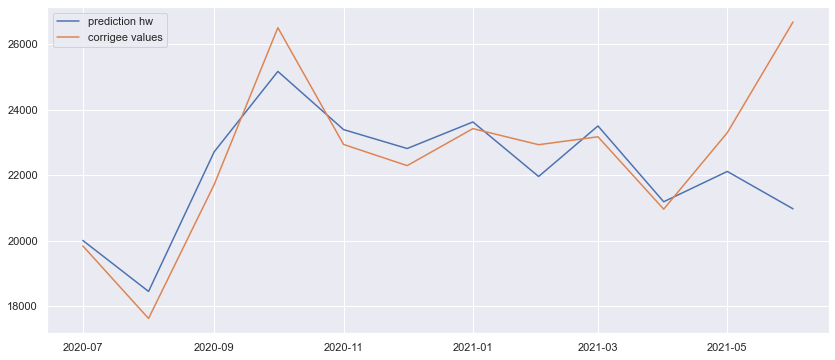

In [37]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['prediction'], label='prediction hw')

plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='corrigee values')

plt.legend()

## Sarima

In [38]:
from statsmodels.tsa.stattools import adfuller, kpss #adfuller => analyse de corrélation de la série, kpss => know if serial is stationnary
from statsmodels.tsa.stattools import acf, pacf #calcul autocorrelation function, partial calcul autocorrelation


print("adfuller, analyse de corrélation de la série")
print(adfuller(serie_corr_df['corrigee'])[1])

print("kpss, tendance stationnaire")
print(kpss(serie_corr_df['corrigee'])[1])
print("p-values < 5%, donc la série est stationaire")



adfuller, analyse de corrélation de la série
0.6699528391819632
kpss, tendance stationnaire
0.03954403635661572
p-values < 5%, donc la série est stationaire


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


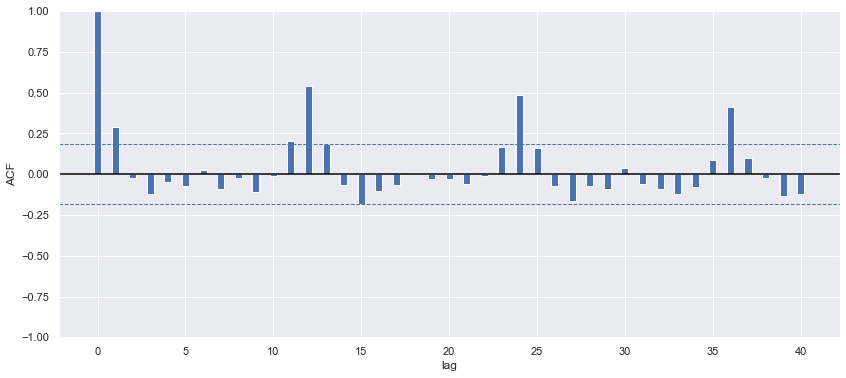

 acf trend to 0, problem of no-stationarity on the 12th month


In [39]:
# Méthode to display acf trend

def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    plt.figure(figsize=(14,6))
    plt.bar(range(len(y_acf)), y_acf, width = 0.4)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=1.)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=1.)
    plt.ylim(-1, 1)
    plt.show()
    return


plot_sortie_acf(acf(np.asarray(serie_corr_df['corrigee'])), len(serie_corr_df['corrigee']), pacf=False)

print(" acf trend to 0, problem of no-stationarity on the 12th month")

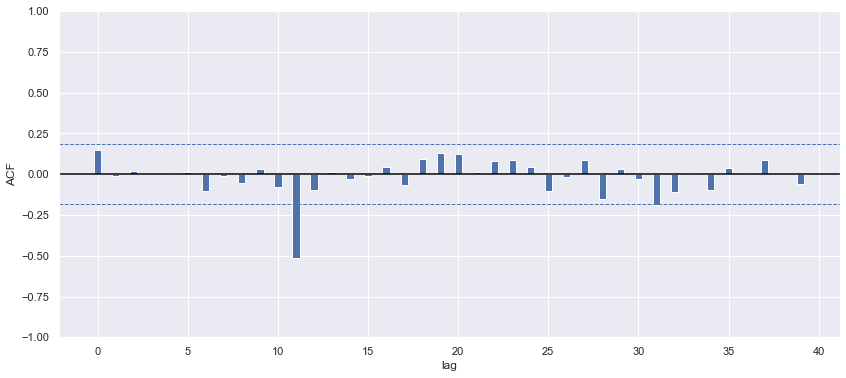

In [40]:
#  use differenciation (i - B)

serie_corr_df_diff = serie_corr_df['corrigee'] - serie_corr_df['corrigee'].shift(12)
plot_sortie_acf(acf(np.asarray(serie_corr_df_diff[13:])), len(serie_corr_df_diff), pacf=True)


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
109    24732.403931
110    21872.919253
111    19106.150379
112    20216.837379
113    21504.524379
Name: corrigee, Length: 114, dtype: float64

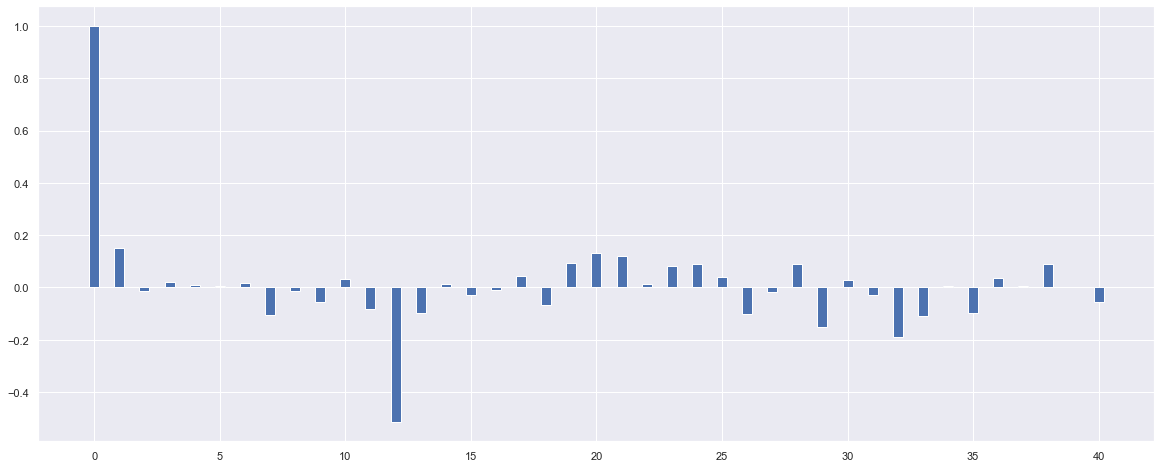

In [76]:


plt.bar(range(len(acf(np.asarray(serie_corr_df_diff[13:])))), acf(np.asarray(serie_corr_df_diff[13:])), width = 0.4)

serie_corr_df['corrigee'].shift(12)

1.0705821884598768e-05
0.1


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


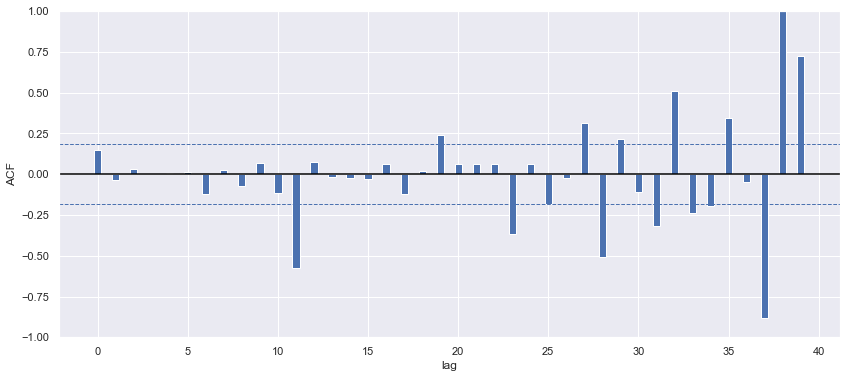

In [41]:
# serie_corr_df['corrigee']
# serie_corr_df['corrigee'].shift(12)

print(adfuller(serie_corr_df_diff[12:])[1])

print(kpss(serie_corr_df_diff[12:])[1])

plot_sortie_acf(pacf(np.asarray(serie_corr_df_diff[13:])), len(serie_corr_df_diff), pacf=True)

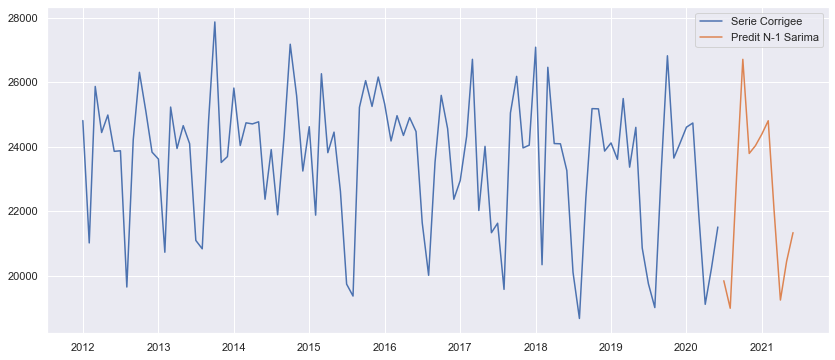

In [42]:
from statsmodels.tsa.statespace.sarimax import *

x_tronc = serie_corr_df.iloc[:-12,:]
x_tronc_t = serie_corr_df
x_a_prevoir = serie_corr_df.iloc[-12:,:]

model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
sarima_pred=results1.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee ')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), sarima_pred, label='Predit N-1 Sarima')
plt.legend()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -800.276
Date:                            Tue, 05 Apr 2022   AIC                           1610.552
Time:                                    14:26:26   BIC                           1623.051
Sample:                                         0   HQIC                          1615.593
                                            - 102                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2866      2.653     -0.108      0.914      -5.487       4.914
ma.L1          0.3236      2.665   

1617.3527867080218

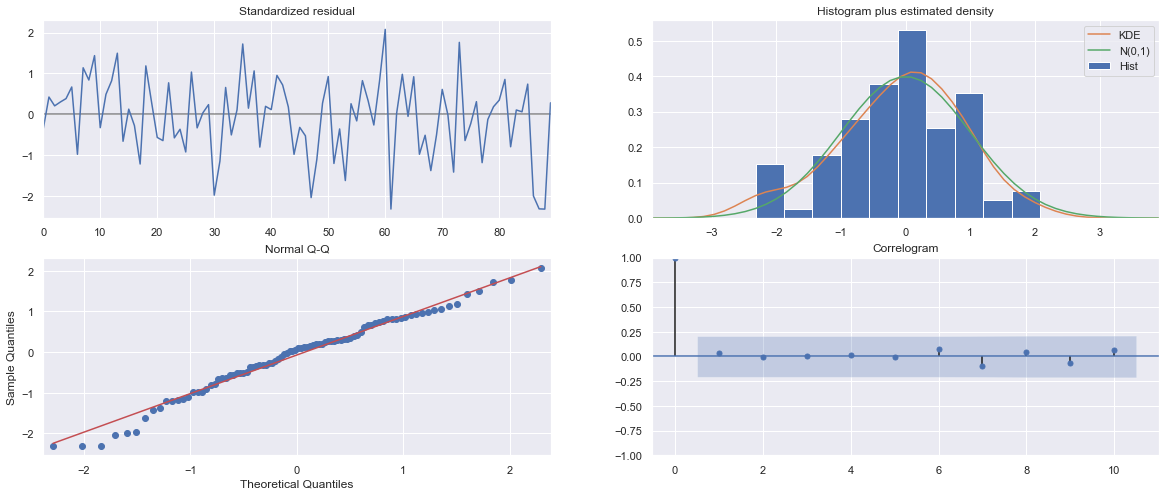

In [43]:
results1.plot_diagnostics()
print(results1.summary())

pred_model2tronc = results1.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
results1
MAE_sarima_model1=np.abs(x_a_prevoir['corrigee']-results1.forecast(12)).mean()
print(MAE_sarima_model1)
MAE_sarima_model2=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model2

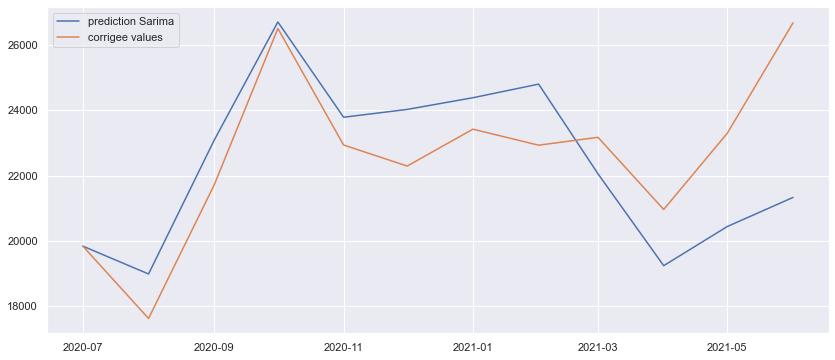

In [44]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],results1.forecast(12), label='prediction Sarima')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='corrigee values')
plt.legend()

In [45]:
x_a_prevoir["sarima"] = results1.forecast(12)
x_a_prevoir

<ipython-input-45-a5bc9cf12b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a_prevoir["sarima"] = results1.forecast(12)


,Mois,corrigee,corrigee_desaison,sarima
102,2020-07-01,19837.959757,22062.576967,19837.274524
103,2020-08-01,17620.425576,21508.486280,18984.353029
104,2020-09-01,21718.969846,21393.817041,23089.317471
105,2020-10-01,26506.924771,23576.503095,26707.654042
106,2020-11-01,22937.661505,21980.183514,23787.414277
107,2020-12-01,22291.631265,22018.129328,24027.498643
108,2021-01-01,23421.925464,22214.861606,24385.719484
109,2021-02-01,22931.160902,23482.940450,24802.276700
110,2021-03-01,23172.594697,21460.873334,22053.888552
111,2021-04-01,20960.836173,21278.850965,19238.718876


In [46]:
serie_corr_df["sarima"] = results1.forecast(114)
serie_corr_df["true_conso"] = df["Conso_totale"].values
serie_corr_df

,Mois,corrigee,corrigee_desaison,sarima,true_conso
0,2012-01-01,24806.859834,23599.795976,19837.274524,51086
1,2012-02-01,21011.241483,21563.021031,18984.353029,54476
2,2012-03-01,25866.412612,24154.691249,23089.317471,43156
3,2012-04-01,24436.483876,24754.498668,26707.654042,40176
4,2012-05-01,24979.844652,24500.856026,23787.414277,35257
...,...,...,...,...,...
109,2021-02-01,22931.160902,23482.940450,18986.827685,43024
110,2021-03-01,23172.594697,21460.873334,23145.925089,43913
111,2021-04-01,20960.836173,21278.850965,26749.152265,37747
112,2021-05-01,23298.099439,22819.110812,23732.868083,35007


In [47]:
df["Conso_totale"].values
serie_corr_df

,Mois,corrigee,corrigee_desaison,sarima,true_conso
0,2012-01-01,24806.859834,23599.795976,19837.274524,51086
1,2012-02-01,21011.241483,21563.021031,18984.353029,54476
2,2012-03-01,25866.412612,24154.691249,23089.317471,43156
3,2012-04-01,24436.483876,24754.498668,26707.654042,40176
4,2012-05-01,24979.844652,24500.856026,23787.414277,35257
...,...,...,...,...,...
109,2021-02-01,22931.160902,23482.940450,18986.827685,43024
110,2021-03-01,23172.594697,21460.873334,23145.925089,43913
111,2021-04-01,20960.836173,21278.850965,26749.152265,37747
112,2021-05-01,23298.099439,22819.110812,23732.868083,35007


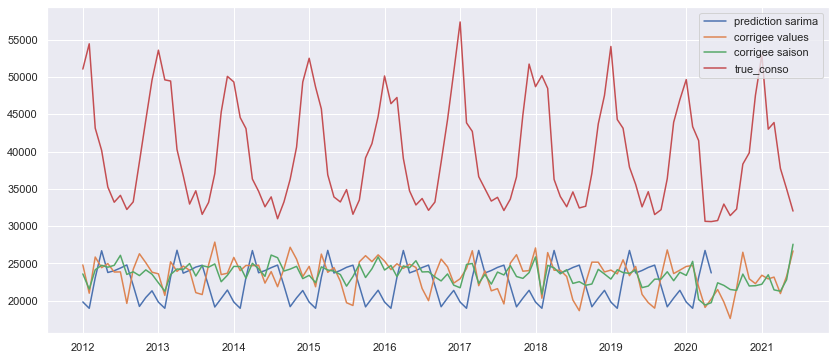

In [48]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'][:-13],results1.forecast(101), label='prediction sarima')
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='corrigee values')
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee_desaison'], label='corrigee saison')
plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso')

plt.legend()

In [49]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(x_tronc["corrigee"],
                         test='adf',
                         m=12,
                         seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1612.972, Time=1.84 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1609.293, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1610.600, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1610.992, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1608.564, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1608.965, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1609.229, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1607.895, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1609.243, Time=0.51 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1609.284, Time=0.94 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1607.599, Time=0.19 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1609.607, Time=0.37 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1609.896, Time=0.36 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1611.760, Time=1.59 sec
 ARIMA(0,0,0)(0,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                             y   No. Observations:                  102
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood                -799.800
Date:                       Tue, 05 Apr 2022   AIC                           1607.599
Time:                               14:26:36   BIC                           1617.598
Sample:                                    0   HQIC                          1611.631
                                       - 102                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -214.7325    230.391     -0.932      0.351    -666.291     236.826
ma.S.L12      -0.0348      0.038     -0.920      0.358      -0.109       0.039
ma.S.L24       0.0520      0.036      1.442      0.149      -0.019       0.123
sigma2      3.265e+06   5.62e+05      5.810      0.000    2.16e+06    4.37e+06
===================================================================================
Ljung-Box (Q):                       41.76   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.39   Prob(JB):                         0.45
Heteroskedasticity (H):               2.36   Skew:                            -0.32
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
pred_tronc = smodel.predict(12)

MAE_sarima_model_optim=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model_optim


1615.3785746542214

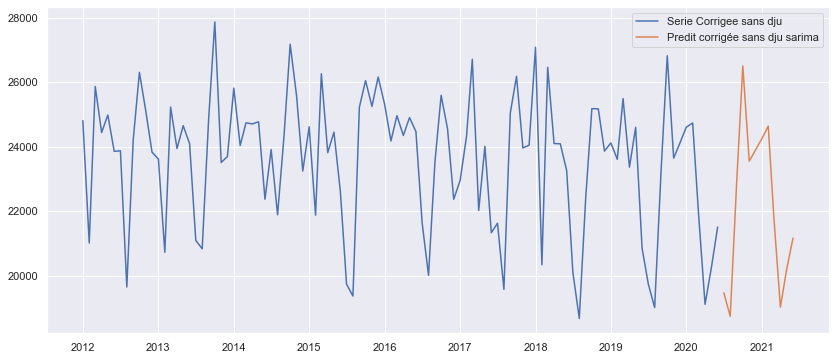

In [51]:
# pred_tronc = smodel.predict(24)


pred_tronc = smodel.predict(12)

plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'][:-12],serie_corr_df['corrigee'][:-12], label='Serie Corrigee sans dju')
plt.plot(serie_corr_df['Mois'][-12:],
                       pred_tronc, label='Predit corrigée sans dju sarima')
plt.legend()
plt.show()


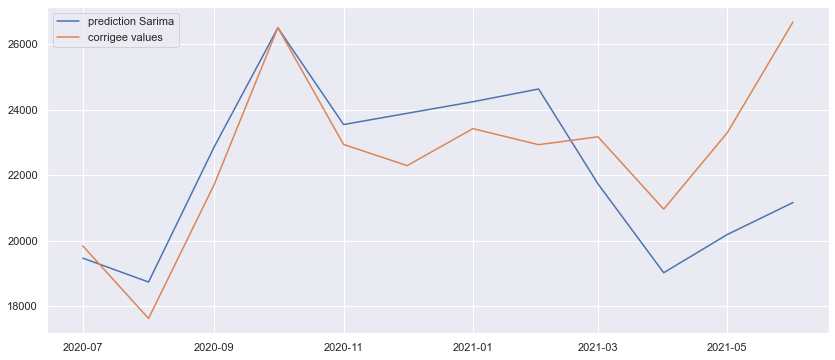

In [52]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],pred_tronc, label='prediction Sarima')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='corrigee values')
plt.legend()

### Comparaison des modèles

MAE SARIMA1
1617.3527866265424
MAE SARIMA2
1615.3785746046808
MAE Hotwinter
1077.7032981758773
moyenne des écart Hotwinter
456.16259170154564
MAE Hot winter add 162
1023.7032981758772


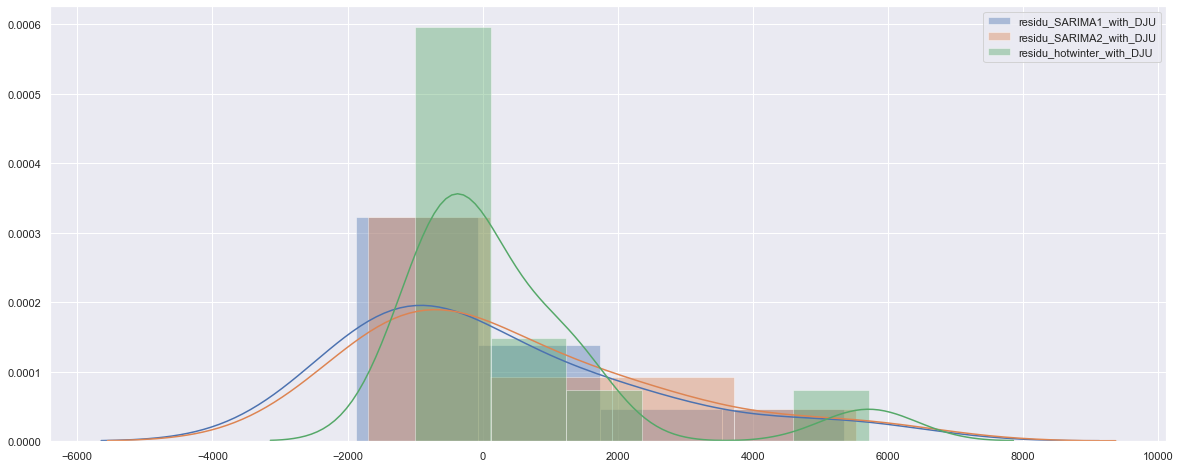

In [53]:
residuals_sarima = (serie_corr_df['true_conso'][-12:] - ((results1.forecast(12) + (df.reset_index()["dju"][-12:] * 75.29839589))))
residuals_hotwinter = ((serie_corr_df['true_conso'][-12:] - ((hw_pred + (df.reset_index()["dju"][-12:] * 75.29839589)))))
residuals_sarima2 = (serie_corr_df['true_conso'][-12:] - ((smodel.predict(12) + (df.reset_index()["dju"][-12:] * 75.29839589))))

print("MAE SARIMA1")
print(abs(residuals_sarima).mean())
print("MAE SARIMA2")
print(abs(residuals_sarima2).mean())
print("MAE Hotwinter")
print(abs(residuals_hotwinter).mean())
print("moyenne des écart Hotwinter")
print((residuals_hotwinter).mean())
print("MAE Hot winter add 162")
print(abs(residuals_hotwinter+162).mean())



sns.distplot(residuals_sarima, label='residu_SARIMA1_with_DJU')
sns.distplot(residuals_sarima2, label='residu_SARIMA2_with_DJU')
sns.distplot(residuals_hotwinter, label='residu_hotwinter_with_DJU')

plt.legend()

### Amélioration du modèle hotwinter pour la prévision

In [54]:

y= np.asarray(serie_corr_df["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend="add", 
                          seasonal='add').fit()
hw_pred = hw.forecast(24)

F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


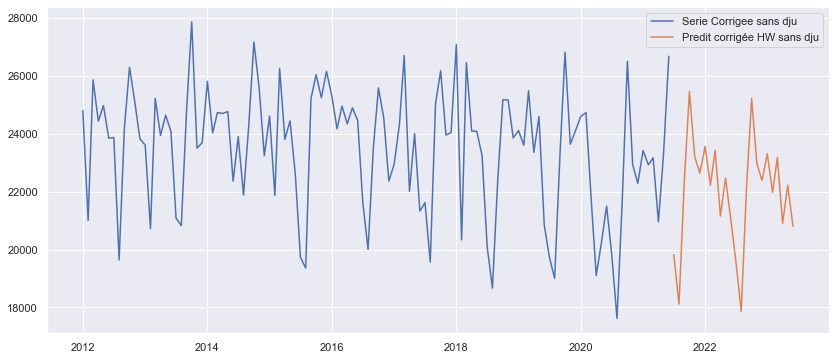

In [55]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(start='6/1/2021',
                       periods=24, freq='M'), hw_pred, label='Predit corrigée HW sans dju')
plt.legend()
plt.show()



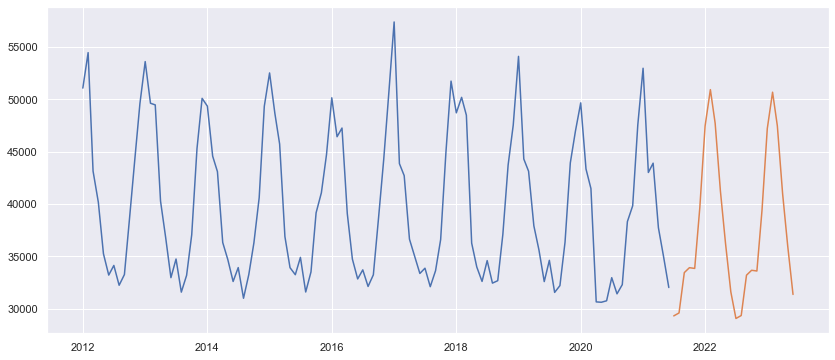

In [56]:

moyenne_dju = (meteo + meteo_chau).mean().append((meteo + meteo_chau).mean()).append((meteo + meteo_chau).mean())

plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso_with_DJU')

plt.plot(pd.date_range(start='6/1/2021',
                       periods=24, freq='M'), hw_pred + (moyenne_dju[5:29] * 75.29839589), label='Predit_hw_with_dju')



In [57]:

y= np.asarray(serie_corr_df["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend=None, 
                          seasonal='add').fit()
hw_pred = hw.forecast(24)

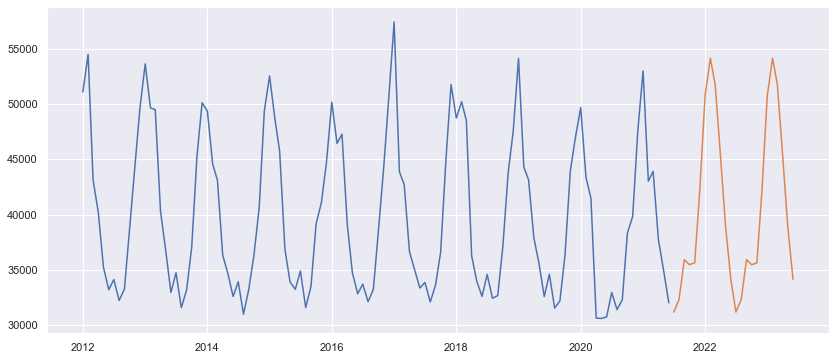

In [58]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso_with_DJU')

plt.plot(pd.date_range(start='6/30/2021',
                       periods=24, freq='M'), hw_pred + (moyenne_dju[5:29] * 85.29839589), label='Predit_hw_with_dju')


In [63]:
df

,Conso_totale,Year,mois,climatisation,chauffage,dju,t
Mois,,,,,,,
2012-01-01,51086,2012,2012-01-01,0.014286,348.985714,349.000000,1
2012-02-01,54476,2012,2012-02-01,0.242857,444.185714,444.428571,2
2012-03-01,43156,2012,2012-03-01,10.171429,219.442857,229.614286,3
2012-04-01,40176,2012,2012-04-01,5.257143,203.771429,209.028571,4
2012-05-01,35257,2012,2012-05-01,46.200000,90.285714,136.485714,5
...,...,...,...,...,...,...,...
2021-02-01,43024,2021,2021-02-01,0.828571,266.014286,266.842857,110
2021-03-01,43913,2021,2021-03-01,4.328571,271.114286,275.442857,111
2021-04-01,37747,2021,2021-04-01,7.928571,215.000000,222.928571,112


In [66]:
df[["Conso_totale", "dju"]].tail()

,Conso_totale,dju
Mois,,
2021-02-01,43024,266.842857
2021-03-01,43913,275.442857
2021-04-01,37747,222.928571
2021-05-01,35007,155.500000
2021-06-01,32032,71.057143


In [68]:
meteo_newformat

,mois,climatisation
0,2021-01-01,0.057143
1,2021-02-01,0.828571
2,2021-03-01,4.328571
3,2021-04-01,7.928571
4,2021-05-01,19.828571
...,...,...
151,2009-08-01,154.442857
152,2009-09-01,63.571429
153,2009-10-01,20.885714
154,2009-11-01,1.071429
